Здесь будет представлен некоторый набор полезных функций и методов, которые могут быть полезны при реальных задачах и соревнованиях по машинному обучению.


Одной из самых популярных функций, которые часто используются, является функция, уменьшающая размер pd.DataFrame, за счет перевода значений в соответсвующий тип вместо значения _double64_ по умолчанию. В большинстве случаев это позволяет уменьшить используемый объем памяти примерно в три раза.

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv('sample_file.csv')

df = reduce_mem_usage(df)

Memory usage of dataframe is 64.32 MB
Memory usage after optimization is: 17.09 MB
Decreased by 73.4%


Очень часто полезной фичей для добавления в датасет является среднее значение таргета по каждой категориальной переменной. для случаев с категорильными фичами с большим набором значений это помогает модели увидеть, какие значения часто соответсвуют таргету. 

In [4]:
def add_mean_target(df, target_name, categorial_names):
    for name in categorial_names:
        df_helper = df[[name, target_name]].groupby(name).mean()
        df_helper.columns = [name + '__mean_encode']
        df = df.join(df_helper, on = name)
    return df

In [5]:
add_mean_target(df, target_name='goal1', categorial_names=['field5'])

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,field5__mean_encode
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626465,11,12,1,1,0,1,...,0,1,1,0,1,0,0,0,0,0.024063
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393799,5,7,2,0,0,2,...,0,1,0,0,0,0,0,0,0,0.019734
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548828,2,3,2,0,0,1,...,0,1,1,0,0,0,0,0,0,0.019734
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238647,10,11,1,1,3,2,...,0,1,1,0,0,0,0,0,0,0.024063
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704102,8,11,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0.024063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083496,7,7,2,0,0,2,...,0,1,0,0,0,0,0,0,0,0.019734
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548828,11,11,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0.019734
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692383,9,9,3,0,0,2,...,1,1,1,0,0,0,0,0,0,0.019734
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704102,11,1,1,1,0,1,...,0,1,1,0,0,0,0,0,0,0.024063


Одним из интересных способов снижения размерности и визуализации данных является t-distributed Stochastic Neighbor Embedding. Это преобразование пытается найти точки в $R^2$ или $R^3$, имеющие приблизительно такое же распределение как и изначальное множество. Добавление результатов этого алгоритма как дополнительных фич может повысить качество модели, так как часто множество получается разделимым.

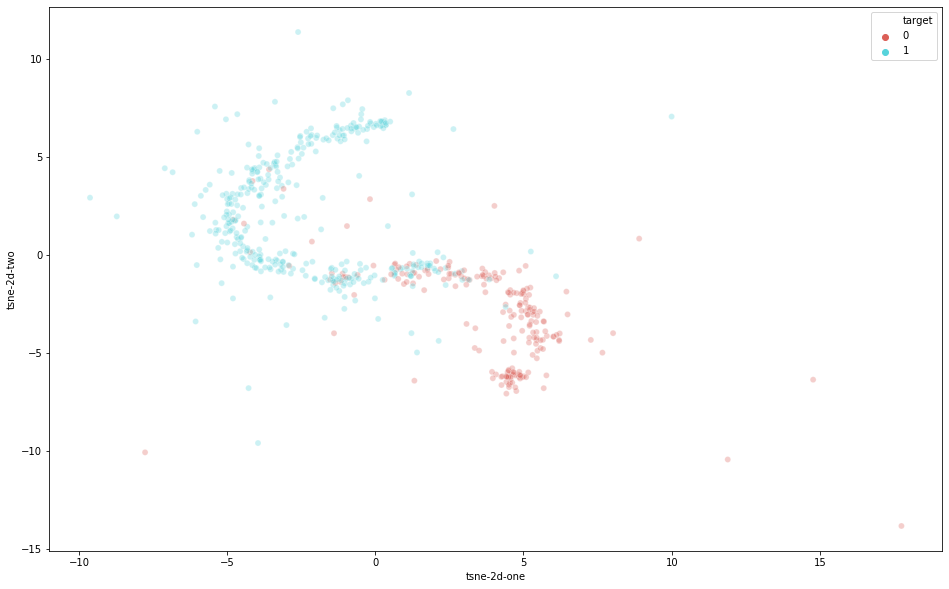

In [40]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['target'] = load_breast_cancer()['target']


tsne = TSNE(n_components=2, verbose=0, perplexity=15, n_iter=250)
tsne_results = tsne.fit_transform(df)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)